1. 산술논리연산

In [1]:
import cv2
img1 = cv2.imread("../data/images/img1.jpg")
img1 = cv2.resize(img1, (320, 240))
img2 = cv2.imread("../data/images/img2.jpg")
img2 = cv2.resize(img2, (320, 240))
img3 = cv2.imread("../data/images/img3.jpg")
img3 = cv2.resize(img3, (320, 240))
img4 = cv2.imread("../data/images/img4.jpg")
img4 = cv2.resize(img4, (320, 240))
img5 = cv2.imread("../data/images/img5.jpg")
img5 = cv2.resize(img5, (320, 240))

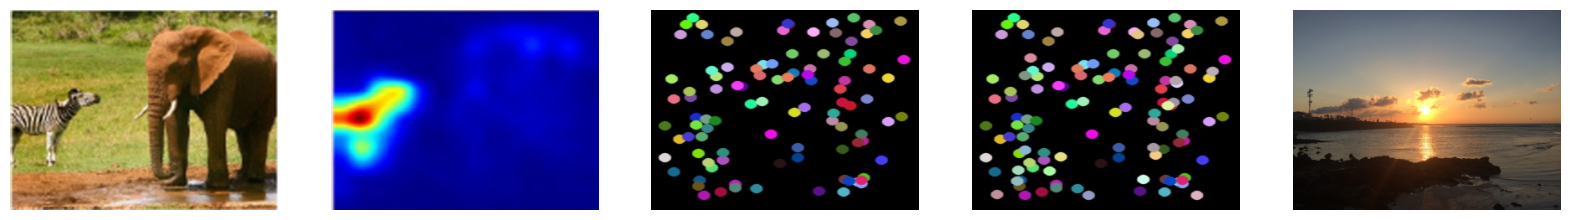

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
for idx, img in enumerate([img1, img2, img3, img4, img5]):
    plt.subplot(1, 5, idx+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [6]:
img5.shape # height, width, channel

(240, 320, 3)

In [3]:
import numpy as np

# 마스크 선언 및 초기화
mask = np.full(shape=img5.shape, fill_value=0, dtype=np.uint8)
h, w, _ = img5.shape
x = (int)(w/2) - 60; y = (int)(h/2) - 60
cv2.rectangle(mask, (x, y), (x + 120, y + 120), (255, 255, 255), -1)

# 산술 밑 논리 연산 수행
ress = []
ress.append(cv2.add(img1, img2))

# 이미지에 가중치를 곱하는 방식
ress.append(cv2.addWeighted(img1, 0.5, img2, 0.5, 0))
ress.append(cv2.subtract(img3, img4))

# 뺄셈 연산을 수행한 후 절대값을 저장하는 방식
ress.append(cv2.absdiff(img3, img4))
ress.append(cv2.bitwise_not(img5))
ress.append(cv2.bitwise_and(img5, mask))

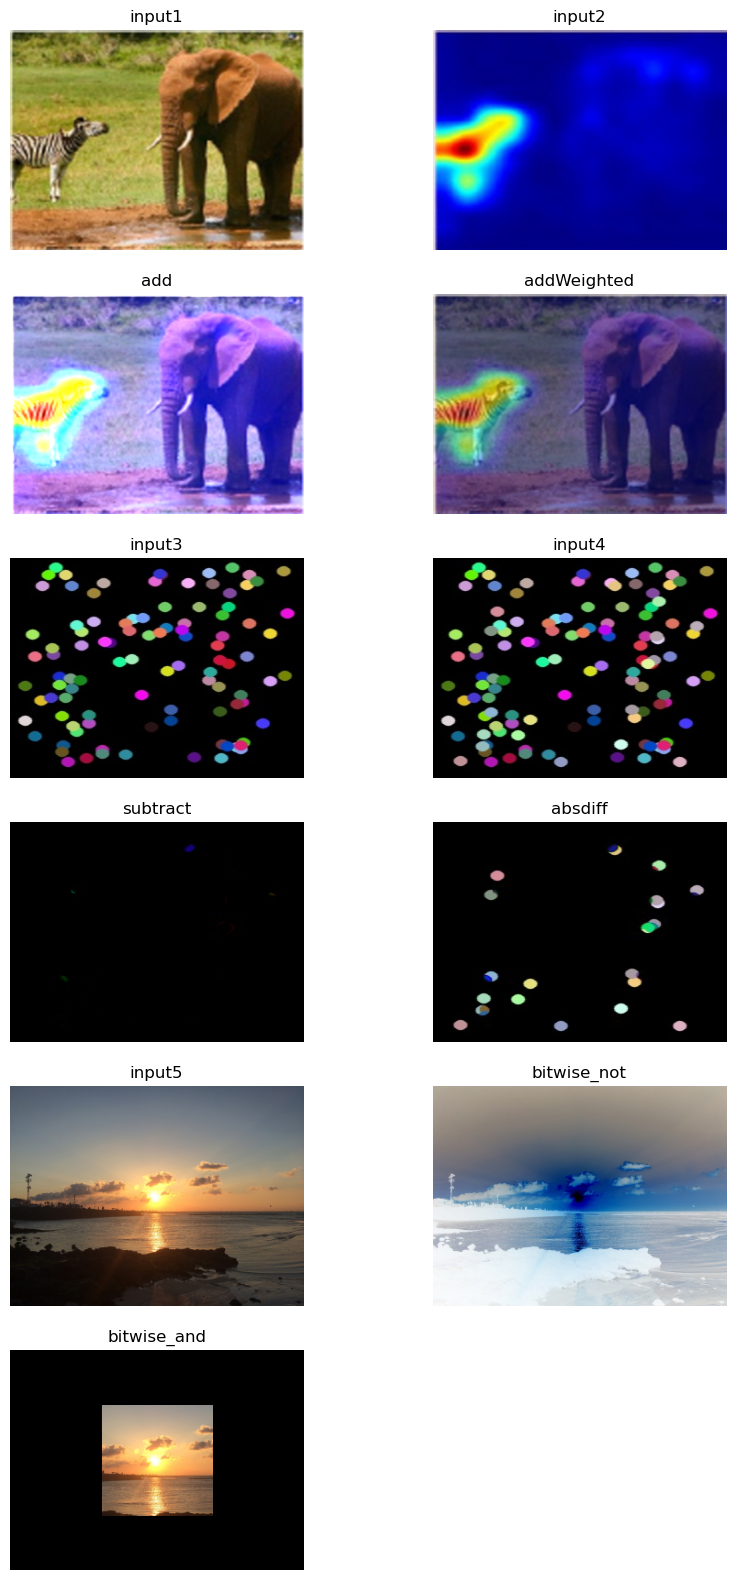

In [4]:
displays = [("input1", img1),
            ("input2", img2),
            ("add", ress[0]),
            ("addWeighted", ress[1]),
            ("input3", img3),
            ("input4", img4),
            ("subtract", ress[2]),
            ("absdiff", ress[3]),
            ("input5", img5),
            ("bitwise_not", ress[4]),
            ("bitwise_and", ress[5]),]
plt.figure(figsize=(10,20))
for idx,(name, out) in enumerate(displays):
    plt.subplot(6,2,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

2. 이미지연결

In [9]:
import cv2
import numpy as np

one = cv2.imread("../data/images/one.jpg")
two = cv2.imread("../data/images/two.jpg")
three = cv2.imread("../data/images/three.jpg")
four = cv2.imread("../data/images/four.jpg")
horizontal1 = np.full((50, one.shape[1], 3), [0, 0, 0],
dtype=np.uint8)
horizontal2 = np.full((50, two.shape[1], 3), (0, 0, 0),
dtype=np.uint8)
left = cv2.vconcat((one, horizontal1, three))
right = np.vstack((two, horizontal2, four))
vertical = np.full((left.shape[0], 50, 3), 0, dtype=np.uint8)
dst = cv2.hconcat((left, vertical, right))
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

3. 배경제거

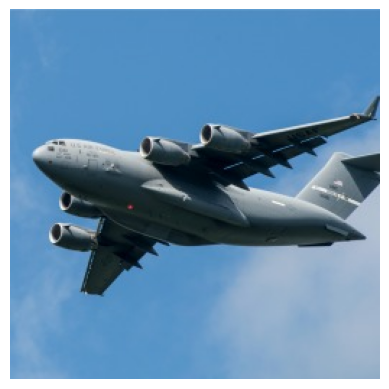

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../data/images/plane_256x256.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [19]:
import numpy as np
# 배경을 제거하고자 하는 전경 주위에 사각형 박스를 그리고 grabCut 알고리즘 적용

# 사각영역 : x, y, width, height
rect = (0, 56, 256, 150)

# 초기 마스크 생성
mask1 = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본이미지
            mask1, # 마스크
            rect, # 사각영역
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            50, # 반복횟수
            cv2.GC_INIT_WITH_RECT) # 사각 영역으로 초기화

# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask2 = np.where((mask1==2) | (mask1==0), 0, 1).astype('uint8')
image_rgb_nobg = image_rgb * mask2[:, :, np.newaxis]

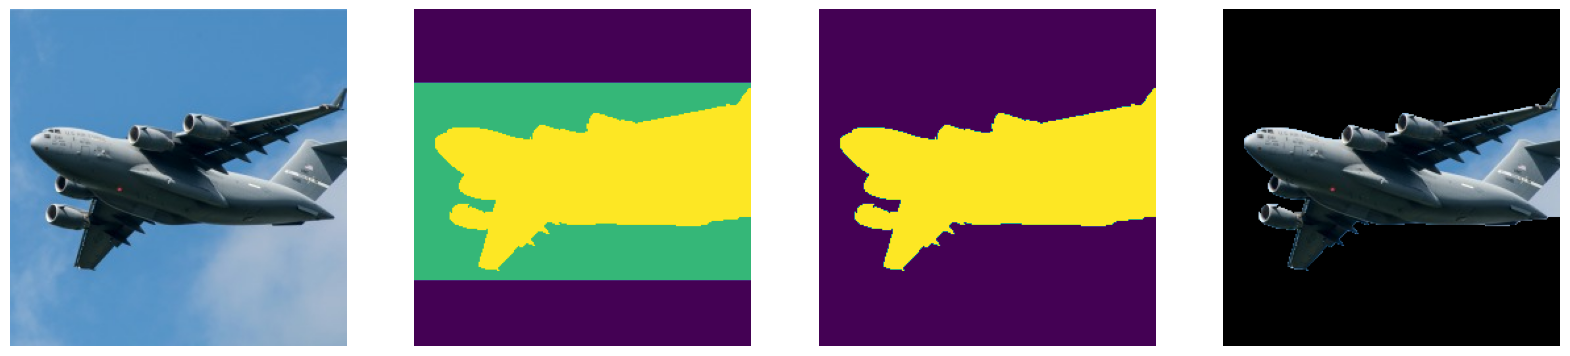

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(mask1)
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(mask2)
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(image_rgb_nobg)
plt.axis("off")
plt.show()

4. edge 검출

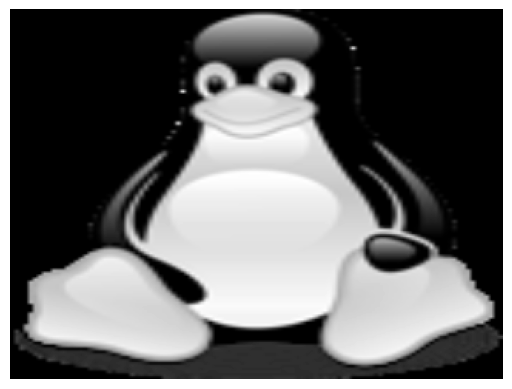

In [21]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread("../data/images/penguin.png", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.show()

In [22]:
# cv2.GaussianBlur(이미지, 커널사이즈, x방향시그마)
img1_blue = cv2.GaussianBlur(img1, (3,3), 0)

# 소벨 필터, Sobel(이미지, cv2.FILTER_SCHARR, x미분차수, y미분차수, 커널사이즈)
res1 = cv2.Sobel(img1, cv2.FILTER_SCHARR, 1, 0, ksize=3)

# 샤를 필터, Scharr(이미지, cv2.FILTER_SCHARR, x미분차수, y미분차수, 커널사이즈)
res2 = cv2.Scharr(img1_blue, cv2.CV_32FC1, 0, 1)
res3 = cv2.Laplacian(img1_blue, cv2.CV_32FC1)

#cv2.Canny(이미지, 하단임계값, 상단임계값, 커널사이즈, 정규화옵션)
res4 = cv2.Canny(img1, 50, 200, apertureSize=5, L2gradient=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


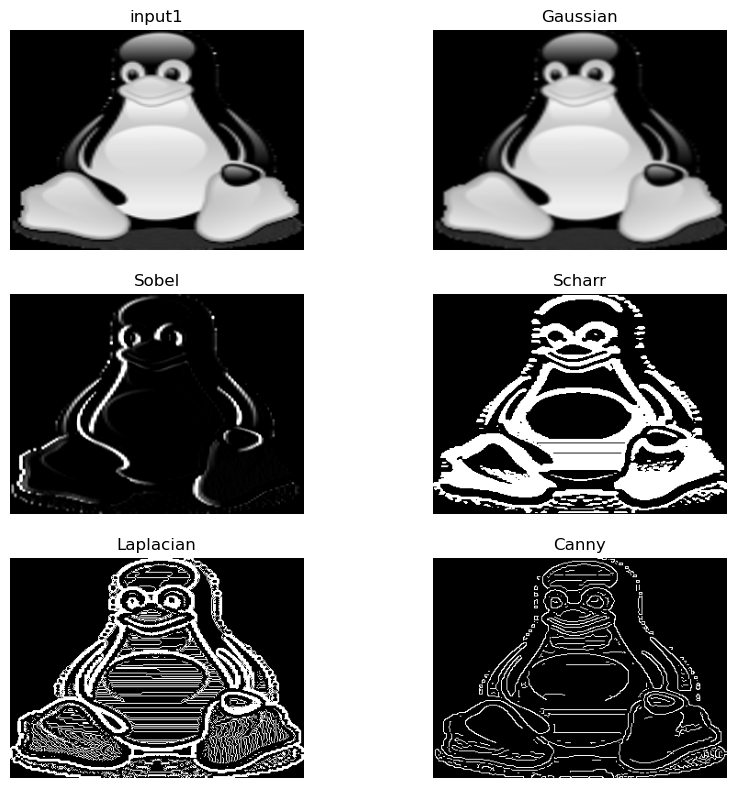

In [23]:
displays = [("input1", img1),
            ("Gaussian", img1_blue),
            ("Sobel", res1),
            ("Scharr", res2),
            ("Laplacian", res3),
            ("Canny", res4)]
plt.figure(figsize=(10,20))
for idx,(name, out) in enumerate(displays):
    plt.subplot(6,2,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

5. 히스토그램평탄화

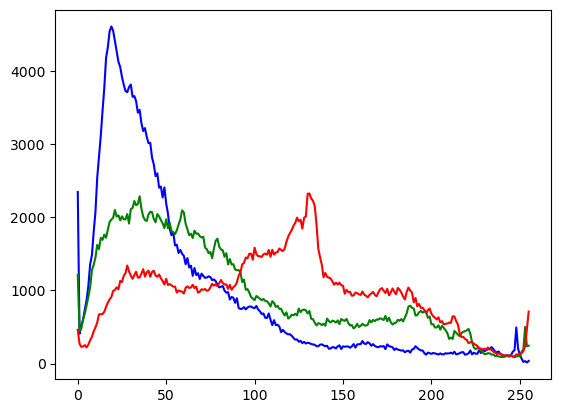

In [35]:
# 컬러이미지 B G R 히스토그램 그려보기

img1 = cv2.imread("../data/images/apple.jpg")
channels = cv2.split(img1)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.show()

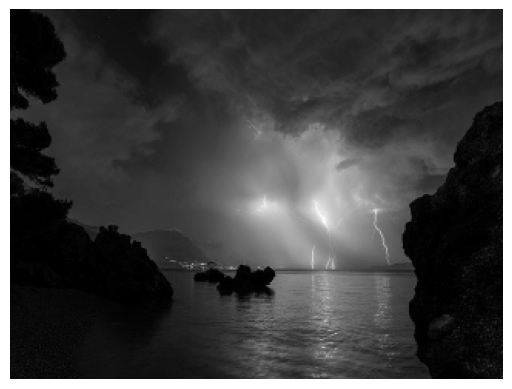

In [27]:
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread("../data/images/img6.jpg",
cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))
plt.imshow(img1,cmap='gray')
plt.axis("off")
plt.show()

In [28]:
import numpy as np

# 히스토그램 평탄화(평활화)
res1 = cv2.equalizeHist(img1)
ch1 = [0]
ranges1 = [0, 256]
histSize1 = [256]

# 히스토그램 계산
hist1 = cv2.calcHist([img1], ch1, None, histSize1, ranges1)
hist2 = cv2.calcHist([res1], ch1, None, histSize1, ranges1)

# 상수곱, 로그곱, 거듭제곱 변환 기반 명암비 조절 및 히스토그램 계산
multi_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
log_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
invol1_lut = np.full(shape=[256], fill_value=0, dtype=np.uint8)
multi_v = 2; gamma1 = 0.4
thres1 = 5; thres2 = 100
max_v_log = 255 / np.log(1 + 255)
max_v_invol1 = 255 / np.power(255, gamma1)
for i in range(256):
    val = i * multi_v
    if val > 255 : val = 255
    multi_lut[i] = val
    log_lut[i] = np.round(max_v_log * np.log(1+i))
    
# 명암비 조절
res2 = cv2.LUT(img1, multi_lut)
res3 = cv2.LUT(img1, log_lut)
hist3 = cv2.calcHist([res2], ch1, None, histSize1, ranges1)
hist4 = cv2.calcHist([res3], ch1, None, histSize1, ranges1)

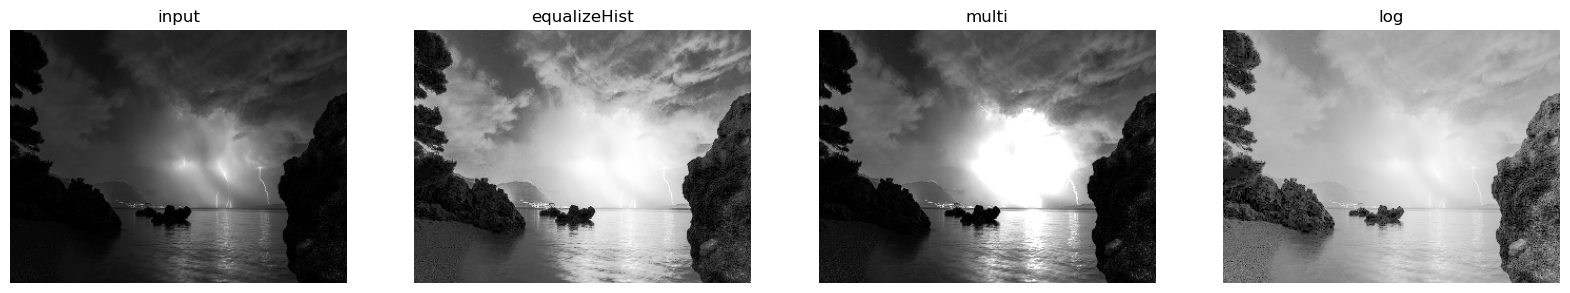

In [29]:
bin_x = np.arange(256)
fig_index = 0
displays = [("input", img1),
            ("equalizeHist", res1),
            ("multi", res2),
            ("log", res3)]
plt.figure(figsize=(20,5))
for idx,(name, out) in enumerate(displays):
    plt.subplot(1,4,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()

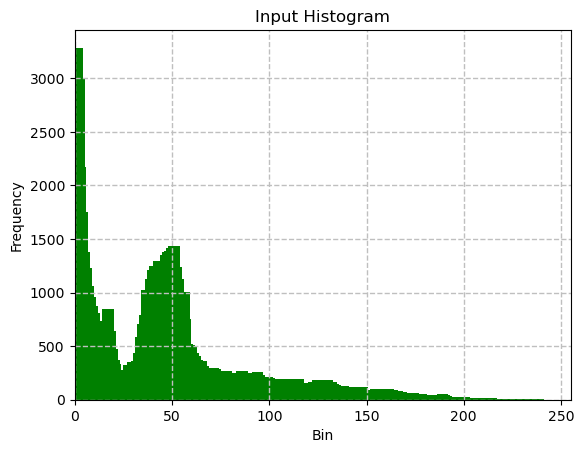

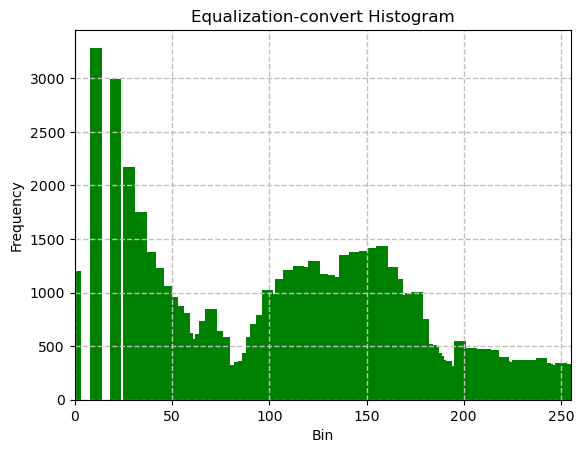

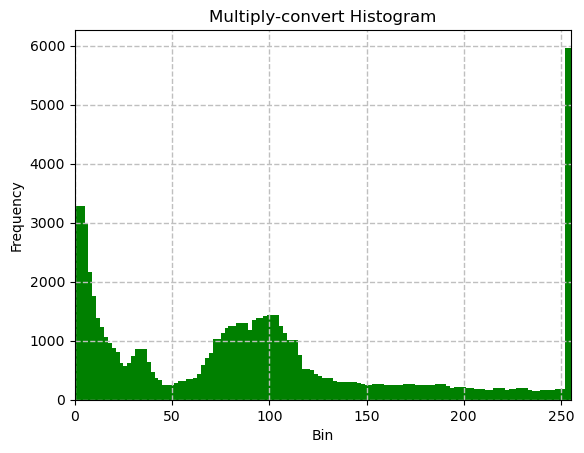

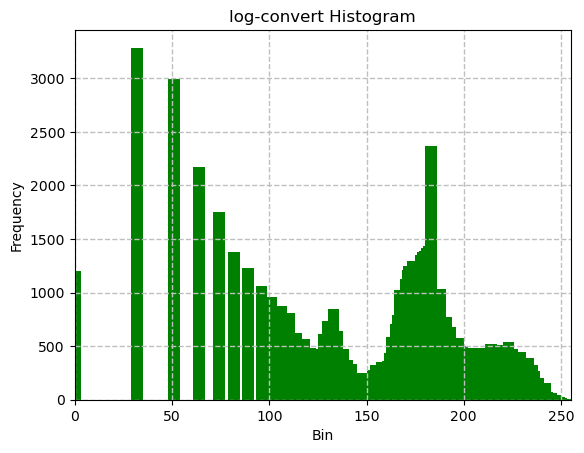

In [30]:
dlsplay_hist = [("Input Histogram", hist1),
                ("Equalization-convert Histogram", hist2),
                ("Multiply-convert Histogram", hist3),
                ("log-convert Histogram", hist4)]
for (name, out) in dlsplay_hist:
    plt.figure(fig_index)
    plt.title(name); plt.xlabel("Bin"); plt.ylabel("Frequency")
    plt.bar(bin_x, out[:,0], width=6, color='g')
    plt.grid(True, lw=1, ls='--', c='.75')
    plt.xlim([0, 255])
    fig_index += 1
plt.show()

6. 트랙바

In [3]:
import cv2
import numpy as np
def onChangeBlue(pos):
    global b
    b = pos
    cv2.imshow("Palette", createImage(b, g, r))

def createImage(b, g, r):
    return np.full((500, 500, 3), (b, g, r), dtype=np.uint8)
b, g, r = 0, 0, 0
cv2.namedWindow("Palette")
cv2.createTrackbar("Blue", "Palette", 55, 255, onChangeBlue)
                                                # 트랙바 변경 이벤트 처리 함수
cv2.createTrackbar("Green", "Palette", 0, 255, lambda x:x)
cv2.createTrackbar("Red", "Palette", 0, 255, lambda x:x)
while True:
    g = cv2.getTrackbarPos("Green", "Palette")
    r = cv2.getTrackbarPos("Red", "Palette")

    cv2. imshow("Palette", createImage(b, g, r))
    if cv2.waitKey(33) & 0xFF == ord('q'): # q 키를 누르면 종료
                # (0) 무한대기
        break
cv2.destroyAllWindows()

In [6]:
ord('q')

113

In [5]:
ord('A') # 문자코드

65

7. kmeans 색상선택

In [17]:
# kmeans를 이용한 색상 선택
import numpy as np
import cv2

img1 = cv2.imread("../data/images/winter.jpg")
img1 = cv2.resize(img1, (320, 240))
cv2.imshow("input", img1)
data = img1.reshape((-1, 3))
data = np.float32(data)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
# flags = cv2.KMEANS_RANDOM_CENTERS # 중심좌표 선택 전략 = 랜덤
flags = cv2.KMEANS_PP_CENTERS # 중심좌표 선택 전략
for i in range(1, 15):
    numK = i * 5 # 클러스터 수(클수록 다양한 색상 표현)
    ret, label, center = cv2.kmeans(data, numK, None, criteria, attempts, flags)
    # 결과 영상 출력
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img1.shape))
    cv2.imshow('k='+str(numK), res)
    cv2.waitKey(1)
cv2.waitKey(0)
cv2.destroyAllWindows()

8. 투시변환

In [1]:
import numpy as np
import cv2

img1 = cv2.imread("../data/images/winter.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (320, 240))

# 투시 변환 수행
h, w = img1.shape
point1_src = np.float32([[1,1], [w-10,10], [5,h-5], [w-4,h-4]])
point1_dst = np.float32([[15,15], [w-60,15], [10,h-25], [w-100,h-50]])
point2_src = np.float32([[148,145], [168,144], [136,223], [188,222]])
point2_dst = np.float32([[136,145], [188,144], [136,223], [188,222]])
per_mat1 = cv2.getPerspectiveTransform(point1_src, point1_dst)
per_mat2 = cv2.getPerspectiveTransform(point2_src, point2_dst)
res1 = cv2.warpPerspective(img1, per_mat1, (w,h))
res2 = cv2.warpPerspective(img1, per_mat2, (w,h))
displays = [("input1", img1),
            ("res1", res1),
            ("res2", res2)]
for (name, out) in displays:
    cv2.imshow(name, out)
cv2.waitKey(0)
cv2.destroyAllWindows()

9. OCR-한글텍스트

In [2]:
from PIL import Image
import pytesseract
image = Image.open('../data/images/kor_text2.png')
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe' 
text = pytesseract.image_to_string(image, lang='kor')
print(text)

선 언 으 로 재 택 근 무 를 폐 지 하 고 완 전 한 사 무 실 근 무 체 제 로 돌 아 가 려 는
무 실 로 불 러 들 이 면 서 이 미 재 택 근 무 에 익 숙 해 진 칙입:이 반 발도 크 다 .

서 울 종 로 구 의 한 회 사 는 최 근 코 로 나 19 확 진 자 를 제 외 한 재 택 근 무 를 종 료 한 다 고 공 지 했 다 .

김 모 (29) 씨 는 " 직 장 이 멀 어 서 출 근 시 간 에 이 미 지 쳐 재 택 근 무 가 더 효 율 적 이 라 고 느 낄
때 가 있 었 다 " 며 " 이 제 완 전 히 코 로 나 19 이 전 문 화 로 돌 아 가 는 듯 해 아 쉽 다 " 고 말 했 다 .




In [3]:
from PIL import Image
import pytesseract
image = Image.open('../data/images/kor_text1.jpg')
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe' 
text = pytesseract.image_to_string(image, lang='kor')
print(text)

우 뉴 놀 아 괜
노 괴 소 닥 역 북 ,
딸 빅 이 찌 모 찌 행



10. OCR-자동차번호판인식

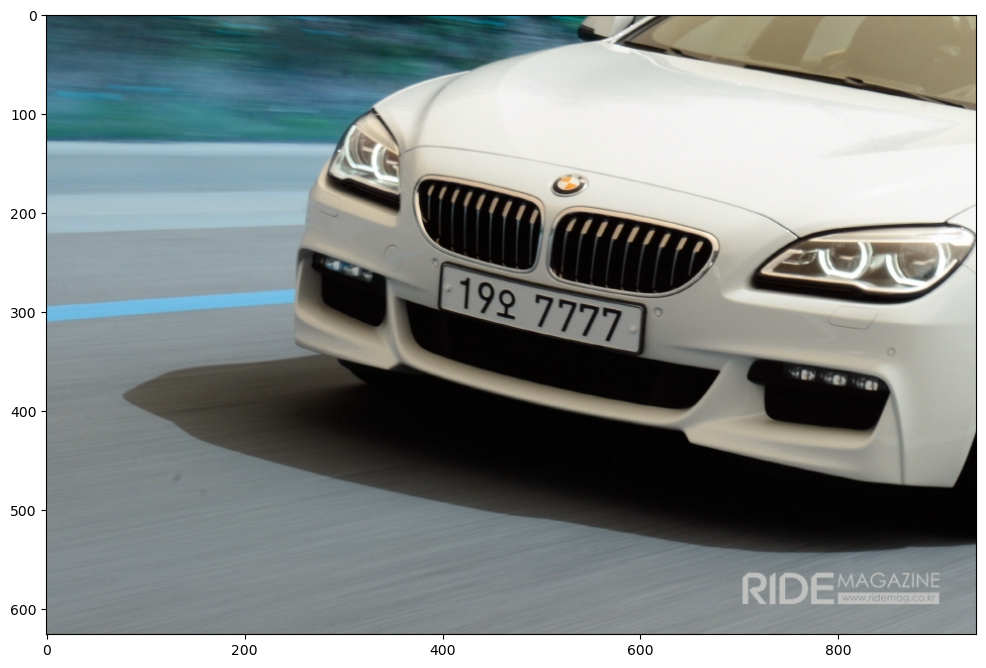

In [4]:
import cv2
import matplotlib.pyplot as plt

img_ori = cv2.imread('../data/images/car/car1.png')
#img_ori = cv2.imread('../data/images/car/car2.png')
#img_ori = cv2.imread('../data/images/car/car3.png')
#img_ori = cv2.imread('../data/images/car/car4.png')
#img_ori = cv2.imread('../data/images/car/car5.png')
#img_ori = cv2.imread('../data/images/car/car6.png')
#img_ori = cv2.imread('../data/images/car/car7.png')

height, width, channel = img_ori.shape

plt.figure(figsize=(12, 10))
plt.imshow(img_ori, cmap='gray')
plt.show()

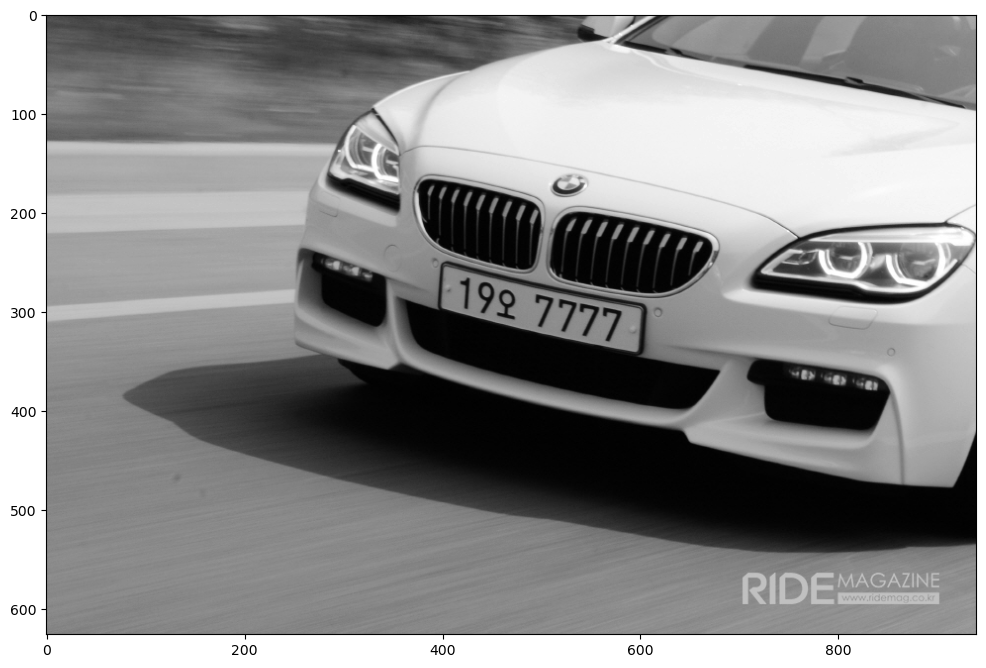

In [5]:
# gray scale로 변환
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

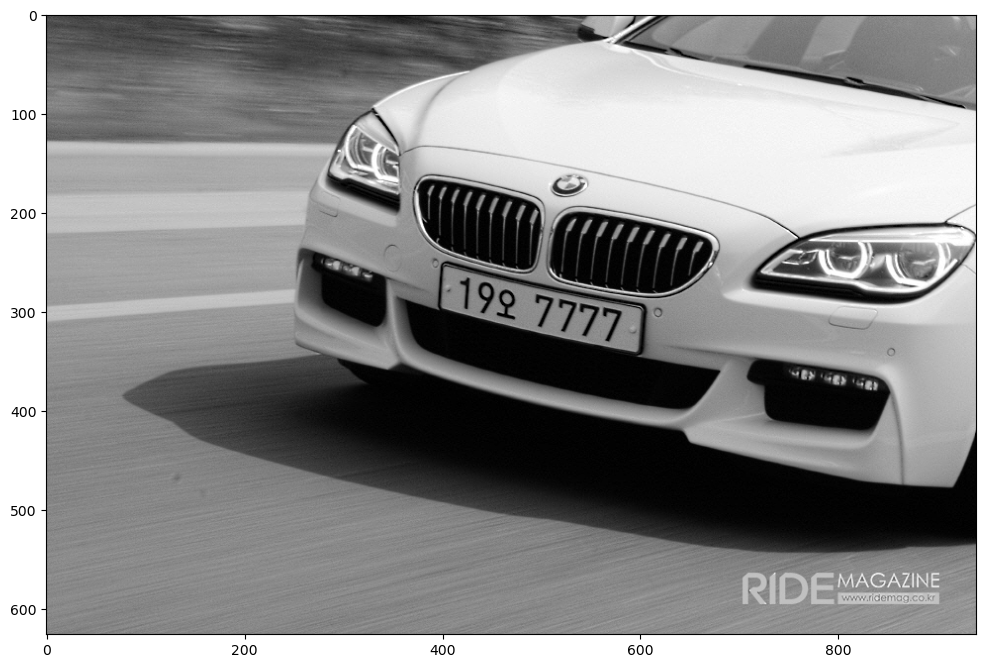

In [6]:
# maximize contrast
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize=(12, 10))
plt.imshow(gray, cmap='gray')

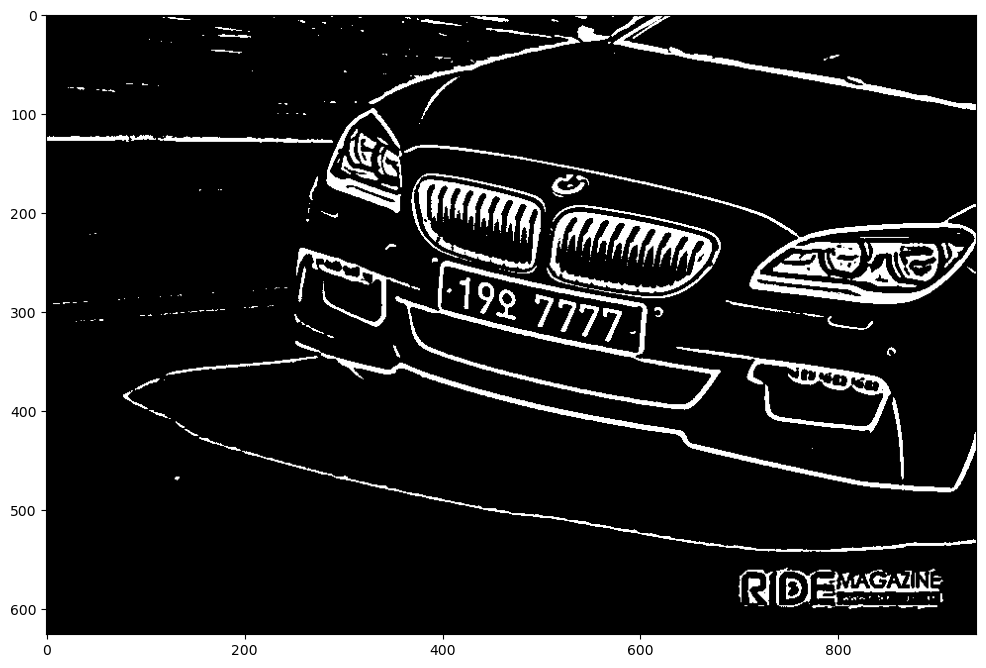

In [7]:
# Adaptive Thresholding
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12, 10))
plt.imshow(img_thresh, cmap='gray')

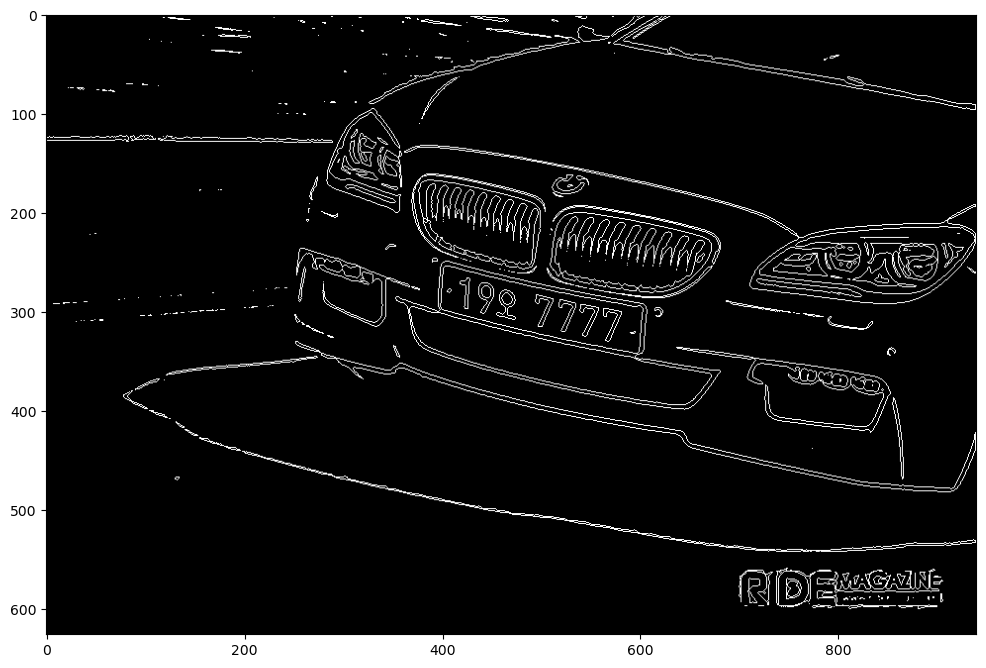

In [8]:
#윤곽선 검출
import numpy as np

contours, _  = cv2.findContours(
    img_thresh, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(12, 10))
plt.imshow(temp_result)

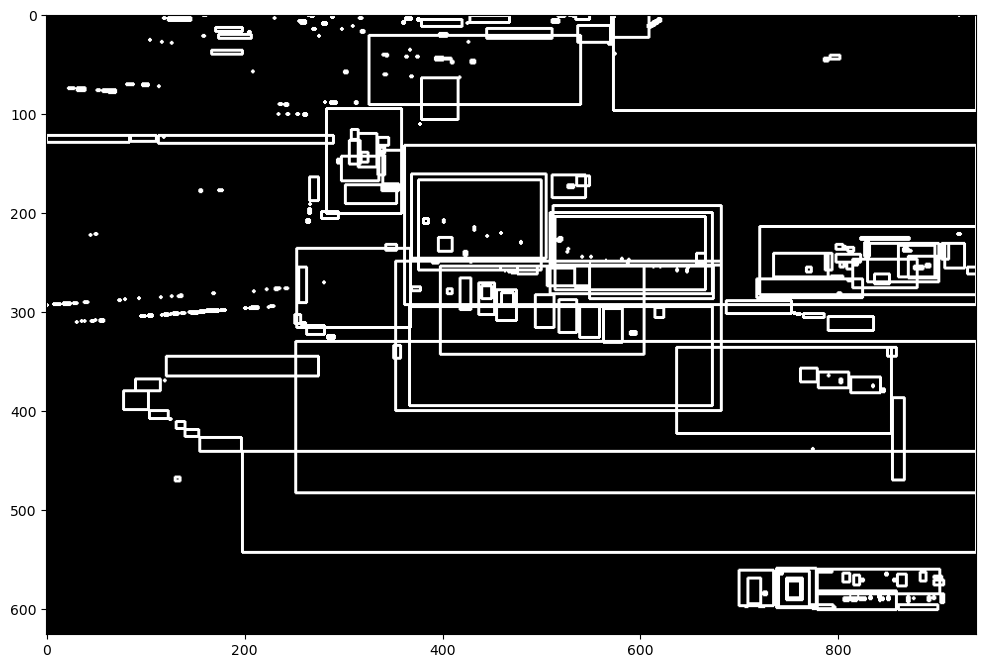

In [9]:
# 데이터 준비
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

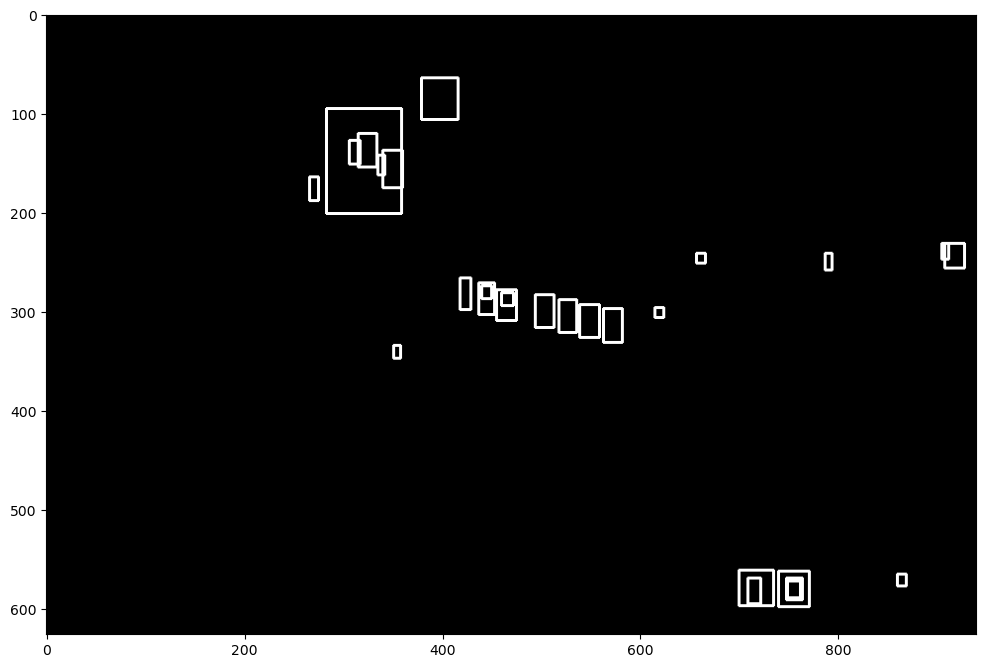

In [10]:
# 문자 크기에 맞는 영역 선택
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    if area > MIN_AREA and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)
        
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

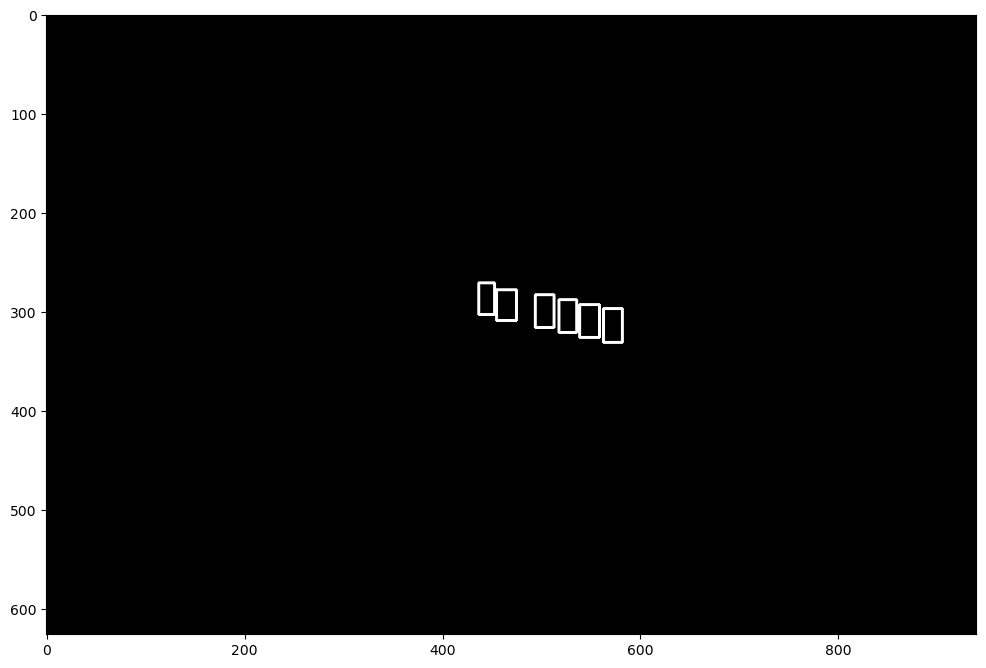

In [11]:
# 등고선 후보 선택
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # 등고선 추가
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
                
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# 등고선 출력
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

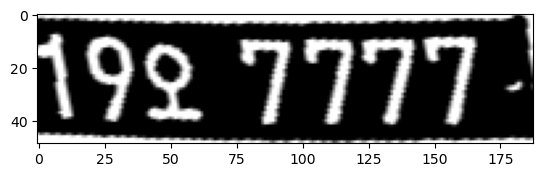

In [12]:
# 이미지 회전
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')

19오7777


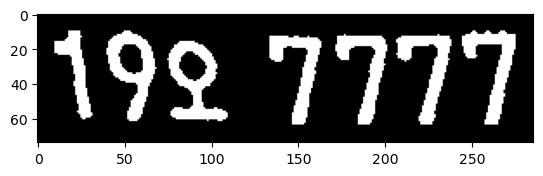

In [14]:
# 문자 판독을 위한 이진화
import pytesseract
longest_idx, longest_text = -1, 0
plate_chars = []
for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        ratio = w / h
        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10,
    borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
    chars = pytesseract.image_to_string(img_result, lang='kor', config='--psm 7 --oem 0')
    result_chars = ''
    has_digit = False
    for c in chars:
        if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    print(result_chars)
    plate_chars.append(result_chars)
    if has_digit and len(result_chars) > longest_text:
        longest_idx = i
    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')

19오7777


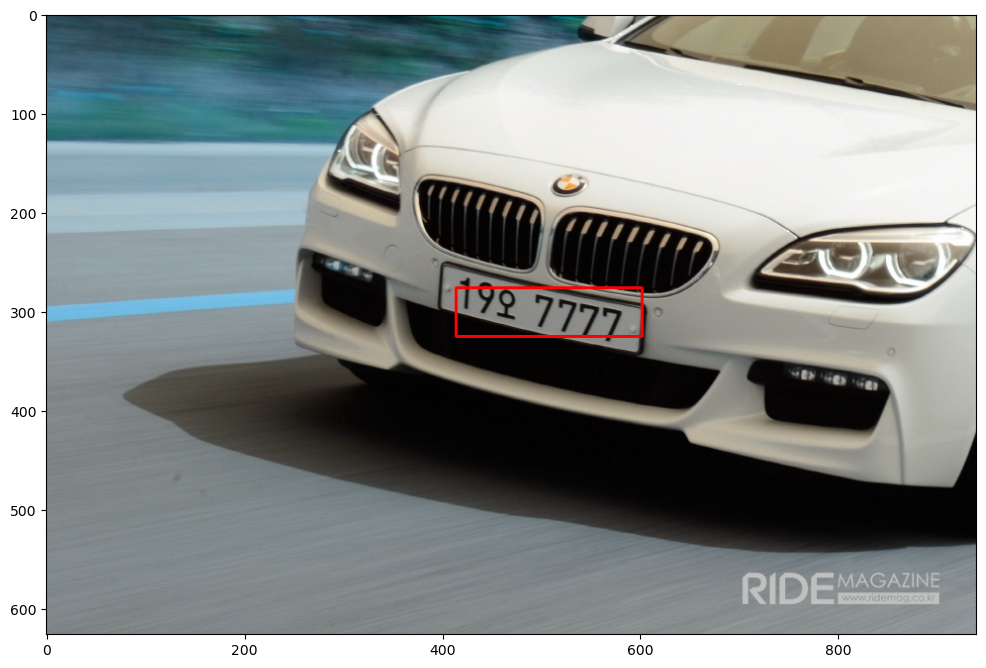

In [15]:
# 결과 출력
info = plate_infos[longest_idx]
chars = plate_chars[longest_idx]

print(chars)

img_out = img_ori.copy()

cv2.rectangle(img_out, pt1=(info['x'], info['y']), pt2=(info['x']+info['w'], info['y']+info['h']), color=(255,0,0), thickness=2)

cv2.imwrite(chars + '.jpg', img_out)

plt.figure(figsize=(12, 10))
plt.imshow(img_out)

11. 객체인식

In [18]:
import cv2
img = cv2.imread("../data/images/image.jpg")
img = cv2.resize(img, (640, 480))
img_object = cv2.imread("../data/images/object.jpg", cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures=40000)
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(img_object, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
count = 100
for i in matches[:count]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(img, (int(x1), int(y1)), 3, (0, 0, 255), 3)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

12. 특징점매칭

In [19]:
import cv2
img = cv2.imread("../data/images/image.jpg")
img=cv2.resize(img, (640, 480))
img_object = cv2.imread("../data/images/object.jpg", cv2.IMREAD_GRAYSCALE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures=40000)
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(img_object, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
count = 100
for i in matches[:count]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(img, (int(x1), int(y1)), 3, (0, 0, 255), 3)
flag = (cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS | cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
matching_result = cv2.drawMatches(img, kp1, img_object, kp2, matches[:count], None, flags=flag)
cv2.imshow("Matching result", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

13. 얼굴인식

In [42]:
import matplotlib.pyplot as plt
import cv2

def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
            for i in range(len(img)):
                titles.append(title)
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [52]:
cascades_path = cv2.data.haarcascades
detectorPaths = {
    "face": "haarcascade_frontalface_default.xml",
    "eyes": "haarcascade_eye.xml",}

# 최신 파일은 포함되어있음

In [53]:
import os

detectors = {}
for (name, path) in detectorPaths.items():
    path = os.path.sep.join([cascades_path, path])
    detectors[name] = cv2.CascadeClassifier(path)

In [54]:
import imutils

image_path = '../data/images/general.jpg'
image = cv2.imread(image_path)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [55]:
faceRects = detectors["face"].detectMultiScale(gray, scaleFactor=1.03, minNeighbors=5, minSize=(40, 40), flags=cv2.CASCADE_SCALE_IMAGE)

In [56]:
for (fX, fY, fW, fH) in faceRects:
    # 얼굴 ROI 추출
    faceROI = gray[fY:fY+ fH, fX:fX + fW]

    # 눈 ROI 추출
    eyeRects = detectors["eyes"].detectMultiScale(faceROI, 
                                                  scaleFactor=1.3, 
                                                  minNeighbors=3, 
                                                  minSize=(3, 3), 
                                                  flags=cv2.CASCADE_SCALE_IMAGE)
    for (eX, eY, eW, eH) in eyeRects:
        ptA = (fX + eX, fY + eY)
        ptB = (fX + eX + eW, fY + eY + eH)
        
        # eye box
        cv2.rectangle(image, ptA, ptB, (0, 0, 255), 2)
        
        # face box
        cv2.rectangle(image, (fX, fY), (fX + fW, fY + fH), (0, 255, 0), 5)

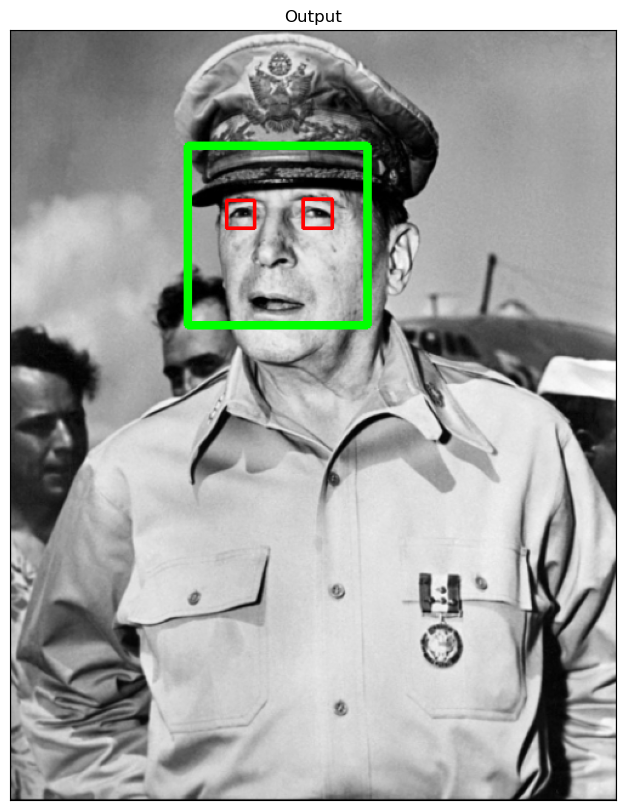

In [57]:
plt_imshow("Output", image, figsize=(16,10))

14. 동영상배경제거

In [59]:
import cv2 as cv

# 백그라운드 감산기 객체 생성
backSub = cv.createBackgroundSubtractorMOG2()
capture = cv.VideoCapture('../data/video/vtest.avi')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    # 배경이 추출된 영상
    fgMask = backSub.apply(frame)
    # 배경에서 추출된 영상을 오프닝한 영상
    fgMask_morph = cv.morphologyEx(fgMask, cv.MORPH_OPEN, kernel)
    cv.rectangle(frame, (10, 2), (100, 20), (255, 255, 255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask Blur', fgMask_morph)
    keyboard = cv.waitKey(1) & 0xFF
    if keyboard == 27:
        break
capture.release()
cv.destroyAllWindows()

15. 동영상객체검출

In [2]:
import cv2
import numpy as np
import tensorflow as tf

model = tf.saved_model.load("../data/model/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
capture = cv2.VideoCapture("../data/video/bird.mp4")
while True:
    ret, frame = capture.read()
    frame=cv2.resize(frame, (640, 480))
    if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
        break
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(input_img)
    input_tensor = input_tensor[tf.newaxis, ...]
    output_dict = model.signatures["serving_default"](input_tensor)
    classes = output_dict["detection_classes"][0]
    scores = output_dict["detection_scores"][0]
    boxes = output_dict["detection_boxes"][0]
    height, width, _ = frame.shape
    for idx, score in enumerate(scores):
        if score > 0.7:
            class_id = int(classes[idx])
            box = boxes[idx]
            x1 = int(box[1] * width)
            y1 = int(box[0] * height)
            x2 = int(box[3] * width)
            y2 = int(box[2] * height)
            cv2.rectangle(frame, (x1, y1), (x2, y2), 255, 1)
            cv2.putText(frame, str(class_id) + ":" + str(float(score)), (x1, y1 - 5), cv2.FONT_HERSHEY_COMPLEX, 1.5, (0, 255, 255), 1)
    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(33) == ord("q"):
        break
cv2.destroyAllWindows()

16. 동영상추적

In [3]:
import cv2
import numpy as np

cap = cv2.VideoCapture("../data/video/vtest.avi")
fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)
while True:
    ret, frame = cap.read()
    if frame is None:
        break
    frame = cv2.resize(frame, (800, 600))
    fgmask = fgbg.apply(frame)
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(fgmask)
    for index, centroid in enumerate(centroids):
        if stats[index][0] == 0 and stats[index][1] == 0:
            continue
        if np.any(np.isnan(centroid)):
            continue
        x, y, width, height, area = stats[index]
        centerX, centerY = int(centroid[0]), int(centroid[1])
        if area > 300:
            cv2.circle(frame, (centerX, centerY), 1, (0, 255, 0), 2)
            cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 0, 255))
    cv2.imshow('mask', fgmask)
    cv2.imshow('frame', frame)
    keyboard = cv2.waitKey(1) & 0xFF
    if keyboard == 27:
        break
cap.release()
cv2.destroyAllWindows()